In [168]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### Load Data

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('vcf_with_labels.csv')
samples = df['samples']
df = df.drop(columns = ['samples', 'score'])
df.head(10)

label  chr22:16050408:T:C  chr22:16050612:C:G  chr22:16050678:C:T  \
0      0                   0                   1                   0   
1      1                   1                   1                   1   
2      0                   1                   1                   1   
3      0                   0                   0                   0   
4      0                   0                   1                   0   
5      1                   1                   1                   1   
6      0                   0                   0                   0   
7      1                   0                   0                   0   
8      1                   0                   0                   0   
9      1                   1                   1                   1   

   chr22:16050984:C:G  chr22:16051107:C:A  chr22:16051249:T:C  \
0                   0                   0                   0   
1                   0                   1                   1   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   1   
6                   0                   0                   0   
7                   0                   0                   1   
8                   0                   0                   0   
9                   0                   1                   1   

   chr22:16051347:G:C  chr22:16051453:A:C  chr22:16051477:C:A  \
0                   0                   0                   0   
1                   1                   1                   0   
2                   1                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   
5                   1                   1                   0   
6                   0                   0                   0   
7                   1                   1                   0   
8                   2                   0                   0   
9                   1                   1                   0   

   chr22:16051480:T:C  chr22:16051497:A:G  chr22:16051722:TA:T  \
0                   0                   0                    0   
1                   1                   1                    0   
2                   1                   1                    0   
3                   0                   1                    0   
4                   1                   1                    0   
5                   1                   1                    0   
6                   0                   0                    0   
7                   0                   1                    0   
8                   0                   2                    0   
9                   1                   1                    0   

   chr22:16051867:T:C  chr22:16051882:C:T  chr22:16052080:G:A  \
0                   0                   0                   1   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   0   
6                   0                   0                   1   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   1                   0   

   chr22:16052112:C:G  chr22:16052159:T:C  chr22:16052239:A:G  \
0                   0                   0                   1   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   1   
4         

### Split Train and Test Sets

In [3]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


### Build Model with Cross Validation

In [4]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                    random_state=999)

In [5]:
scoring_metric = 'accuracy'

In [6]:
rf_classifier = RandomForestClassifier(random_state = 999)
rf_cv_results_full = cross_val_score(estimator=rf_classifier,
                                    X=D_test,
                                    y=t_test,
                                   cv=cv_method, 
                                   scoring=scoring_metric)
rf_cv_results_full.mean().round(3)

0.58

### Feature Importance

In [7]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [8]:
best_features_rfi = df.columns[fs_indices_rfi].values
print('The top 10 features are:', ", ".join([str(i) for i in best_features_rfi]))

The top 10 features are: chr22:17770344:A:T, chr22:17712566:C:T, chr22:17720703:C:T, chr22:17725150:C:T, chr22:17791528:G:A, chr22:17699625:A:G, chr22:17725695:A:G, chr22:17721595:T:C, chr22:17718084:A:C, chr22:17725287:C:T


In [9]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print('The importance scores for the previous 10 features are:', ", ".join([str(round(i,4)) for i in feature_importances_rfi]))

The importance scores for the previous 10 features are: 0.007, 0.0058, 0.0049, 0.0042, 0.004, 0.004, 0.004, 0.0039, 0.0039, 0.0037


/var/folders/kt/5z_vtfbj51b1rnt8qswv9p940000gn/T/ipykernel_12789/168479145.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


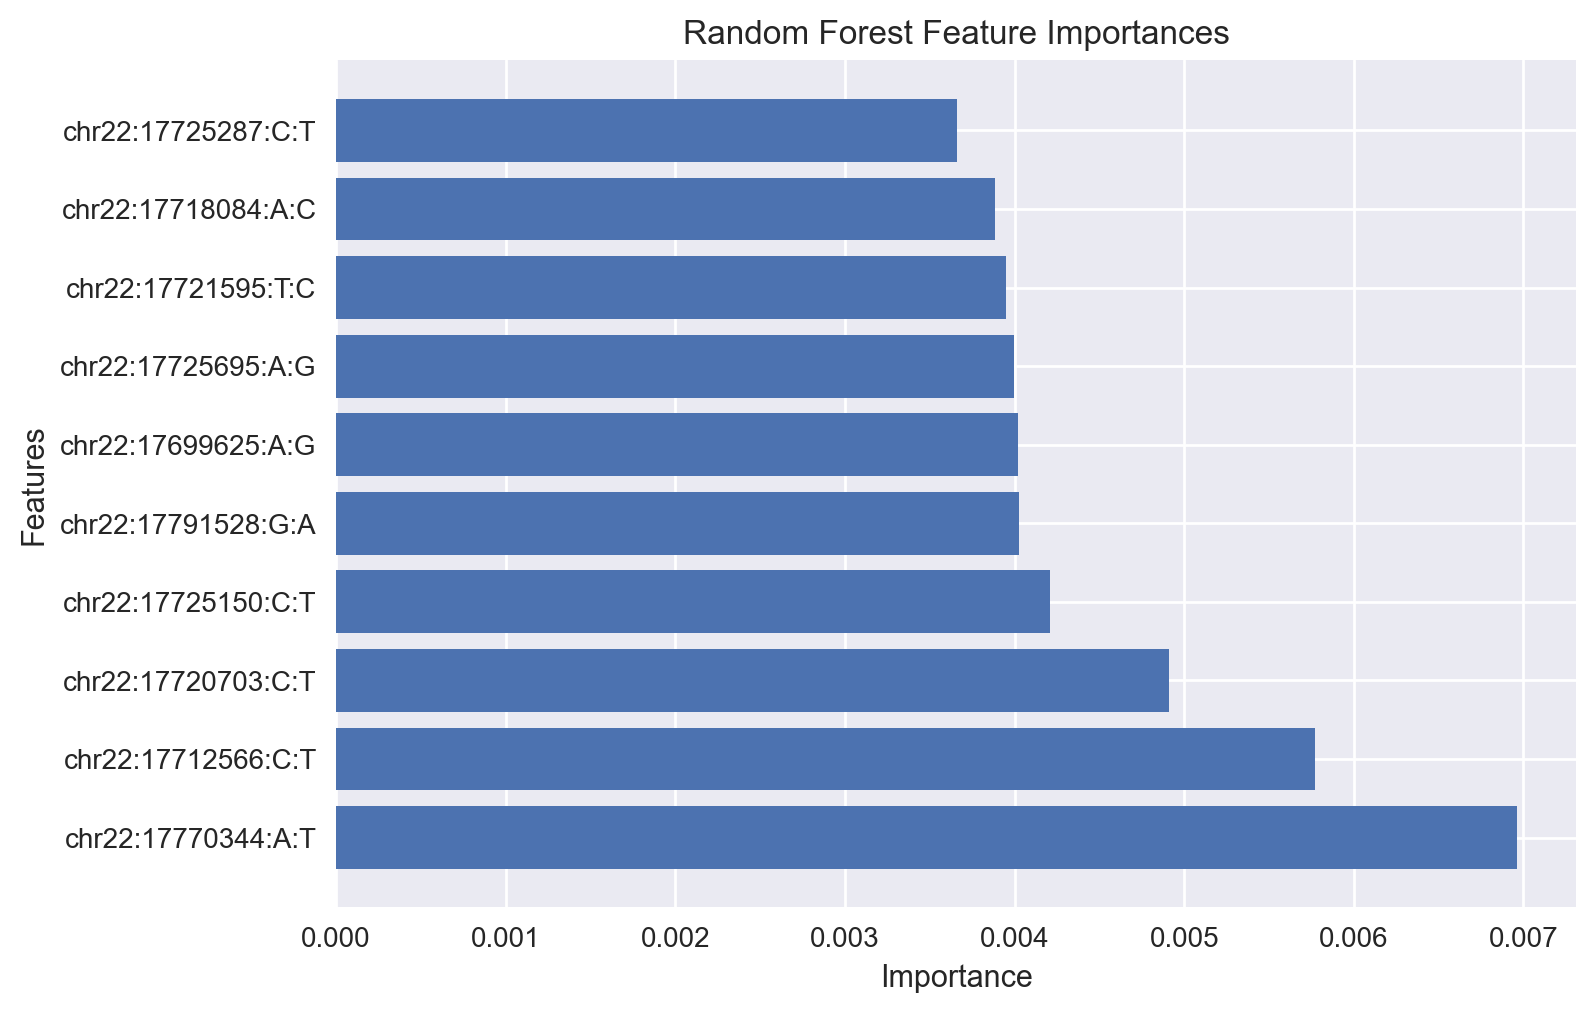

In [10]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

### Grid Search for Hyperparameter Tuning

In [11]:
params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 500],
             'max_depth': [2,5,7,10,12]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')
gs_RF.fit(D_train,t_train) 

Fitting 15 folds for each of 30 candidates, totalling 450 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='roc_auc', verbose=1)

In [12]:
print('The best parameters for Random Forest Classifier are: ', gs_RF.best_params_)

The best parameters for Random Forest Classifier are:  {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 500}


In [13]:
print("The best score using area under the ROC curve metric is:", round(gs_RF.best_score_,3))

The best score using area under the ROC curve metric is: 0.618


In [14]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,criterion,max_depth,n_estimators,test_score
14,gini,12,500,0.618329
6,gini,7,100,0.617477
13,gini,12,250,0.617120
8,gini,7,500,0.616576
11,gini,10,500,0.616189
7,gini,7,250,0.615809
10,gini,10,250,0.614294
29,entropy,12,500,0.614123
12,gini,12,100,0.613980
9,gini,10,100,0.613275


/Users/chandermohan/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


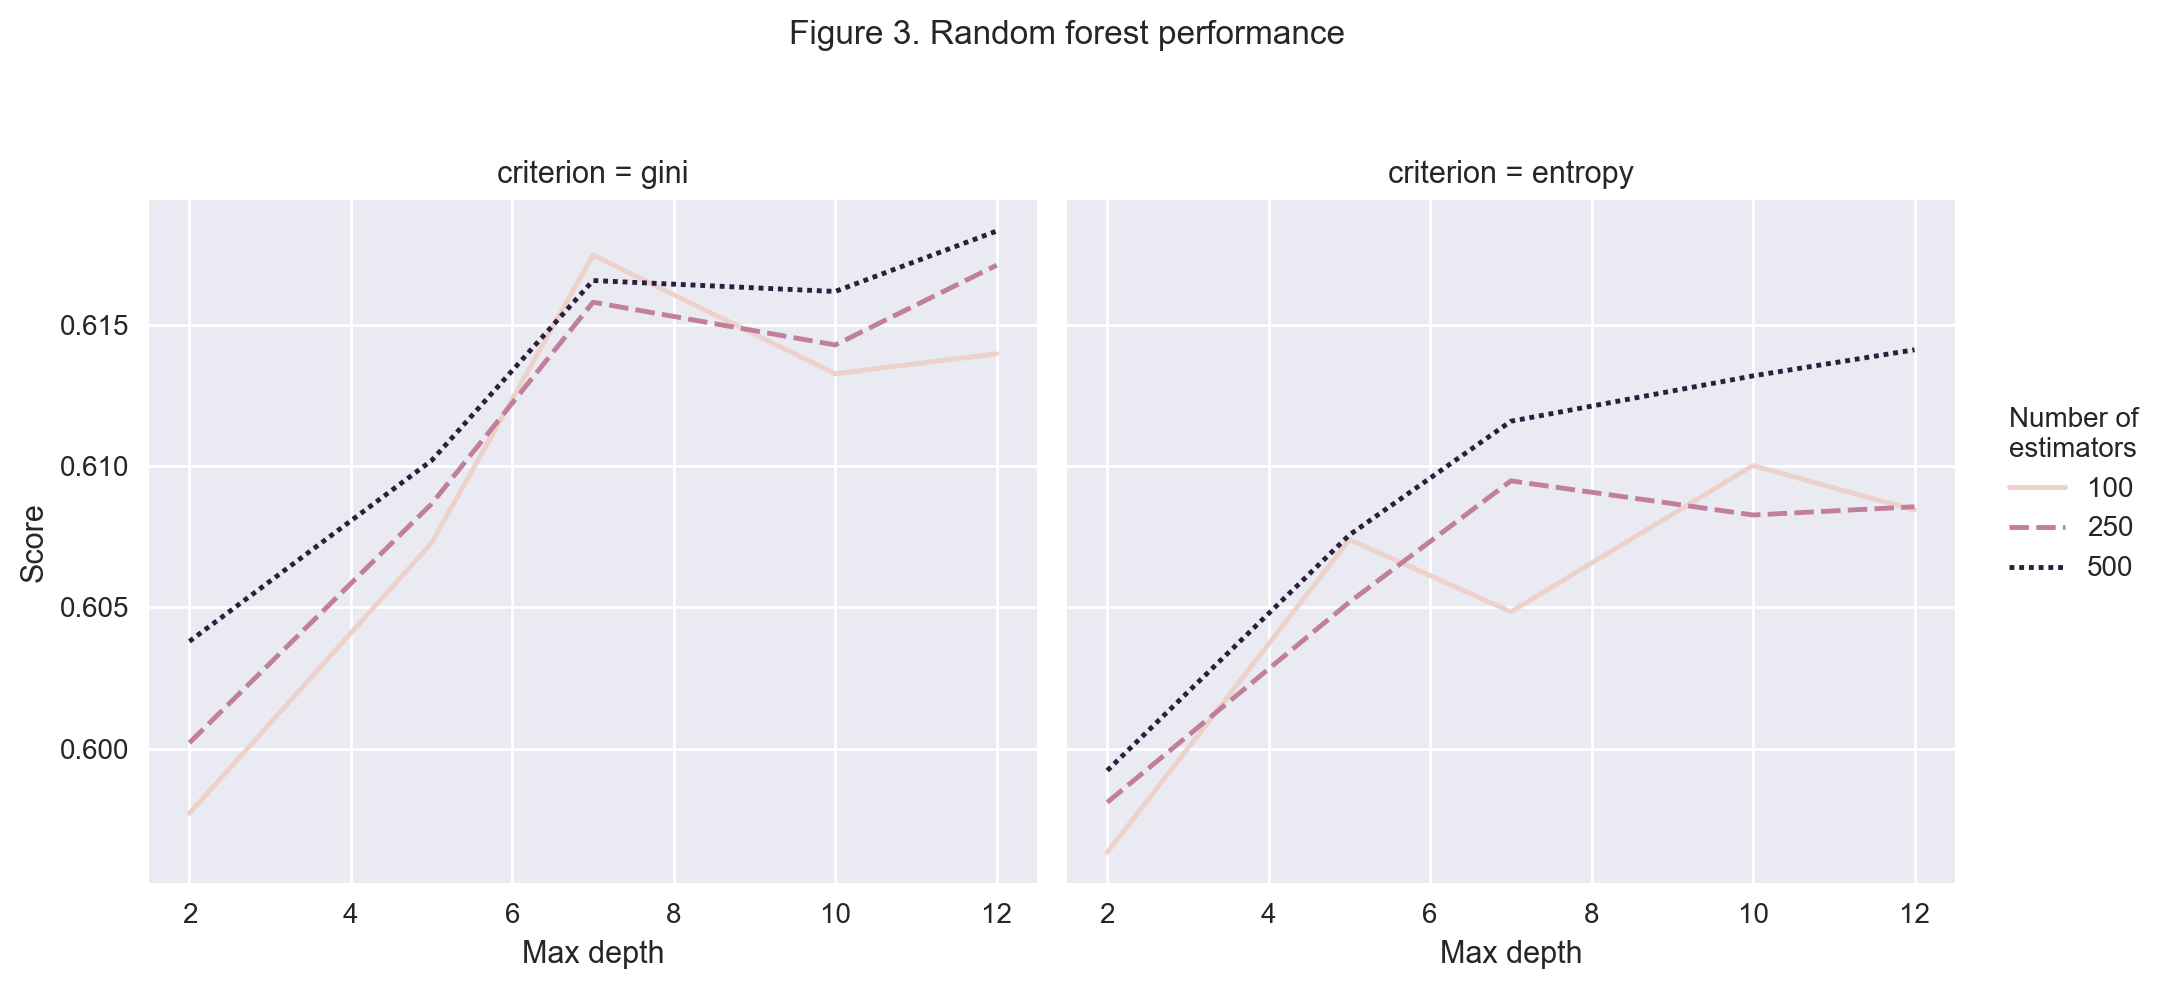

In [15]:
rel_plot=sns.relplot(data=results_RF,
            x='max_depth',
            y='test_score',
           col='criterion',
           hue='n_estimators', style="n_estimators",
           kind='line')
rel_plot.axes[0,0].set_xlabel('Max depth')
rel_plot.axes[0,1].set_xlabel('Max depth')
rel_plot.axes[0,0].set_ylabel('Score')
rel_plot._legend.set_title("Number of\nestimators")
rel_plot._legend._legend_box.align="left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle("Figure 3. Random forest performance")
plt.show(rel_plot)

### Model Based on Best Hyperparameters

In [16]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(D_train, t_train)
predictions = rf.predict(D_test)       

In [17]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [18]:
pred_df.head(10)

,actual_label,predicted_label
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,0


In [19]:
accuracy_score(t_test, predictions)

0.6064516129032258

In [20]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       185
           1       0.67      0.05      0.09       125

    accuracy                           0.61       310
   macro avg       0.64      0.52      0.42       310
weighted avg       0.63      0.61      0.48       310



In [21]:
# Data Augmentation Here

### *mixup*: Per the Literature

In [85]:
def mixup_binary_data(X, y, alpha=0.2, lower=0, upper=2):
    # Arrays for augmented data
    new_X = []
    new_y = []

    for i in range(len(X)):
        # Pick two random observations
        idx1, idx2 = np.random.choice(len(X), 2, replace=False)
        
        # Create a lambda value based on Beta distribution for balanced mixing
        lam = np.random.beta(alpha, alpha)
        
        # Mix the two random samples based on the lambda value
        mixed_features = lam * X[idx1] + (1 - lam) * X[idx2]
        mixed_target = lam * y[idx1] + (1 - lam) * y[idx2]

        # Ensure the mixed feature values are within the valid range
        mixed_features = np.clip(mixed_features, lower, upper)
        
        # Append mixed data
        new_X.append(mixed_features)
        new_y.append(mixed_target)

    # Convert from Python list to np array
    mixed_X = np.array(new_X)
    mixed_y = np.array(new_y)
    
    return mixed_X, mixed_y

In [23]:
mixed_X, mixed_y = mixup_binary_data(D_train, t_train, alpha=0.2) 

##### Random Forest Classification

In [24]:
# To keep it as a classification problem, make a .5 threshold for disease or no disease
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [25]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [26]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [27]:
accuracy_score(t_test, predictions)

0.603225806451613

In [28]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       185
           1       1.00      0.02      0.03       125

    accuracy                           0.60       310
   macro avg       0.80      0.51      0.39       310
weighted avg       0.76      0.60      0.46       310



##### Random Forest Regression

In [29]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Regression problem keeps the labels as mixup created them
regressor.fit(mixed_X, mixed_y)

RandomForestRegressor(random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24907669385660475


In [31]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4290322580645161


### *mixup*: Change Features
What if feature values were -1, 0, and 1? Would that make the mixed features more symmetrical and less skewed towards no mutation?

In [32]:
D_train_shift = np.where(D_train == 0, -1, np.where(D_train == 1, 0, 1))
D_test_shift = np.where(D_test == 0, -1, np.where(D_test == 1, 0, 1))

In [33]:
mixed_X, mixed_y = mixup_binary_data(D_train_shift, t_train, alpha=0.2, lower=-1, upper=1)

##### Random Forest Classification

In [34]:
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [35]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                            criterion = results_RF['criterion'].iloc[0],
                            max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [36]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [37]:
accuracy_score(t_test, predictions)

0.5935483870967742

In [38]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74       185
           1       0.47      0.06      0.10       125

    accuracy                           0.59       310
   macro avg       0.53      0.51      0.42       310
weighted avg       0.55      0.59      0.48       310



##### Random Forest Regression

In [39]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(mixed_X, mixed_y)

RandomForestRegressor(random_state=42)

In [40]:
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}") 

Mean Squared Error: 0.2469409076037367


In [41]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.44516129032258067


### Feature Stability
- Compare feature importance rankings of baseline and data augmented pipelines
- Measure permutations of multiple random forest runs. How much does ranking change over identical runs? Create confidence intervals

# Cross-Label Augmentation 

In [221]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


**Here, we're defining a function that accepts a specified percentage of data augmentation and an alpha value as parameters. The function employs the mixup algorithm to perform data augmentation on a subset of rows based on the provided percentage.**

In [226]:
import numpy as np

def augmented_split_and_combine(D_train, t_train, augmentation_percentage, alpha):
    
    if augmentation_percentage!=0:
        
        num_samples = len(D_train)
        
        # Determine the number of samples to split for augmentation
        num_samples_to_augment = int(num_samples * augmentation_percentage)
        
        # Randomly select indices for the samples to augment 
        augment_indices = np.random.choice(num_samples, 
                                           num_samples_to_augment,
                                           replace=False)
        
        # Split the data into augmented and remaining portions
        D_augment = D_train[augment_indices]
        t_augment = t_train[augment_indices]
        
        D_remaining = np.delete(D_train,
                                augment_indices, 
                                axis=0)
        
        t_remaining = np.delete(t_train, 
                                augment_indices, 
                                axis=0)
        
        # Perform data augmentation on the selected portion
        
        augmented_X, augmented_y = mixup_binary_data(D_augment, 
                                                     t_augment,
                                                     alpha)
        
        augmented_y1 = (augmented_y >= 0.5).astype(int)
        
        # Combine augmented data with remaining data
        
        combined_X = np.vstack((D_remaining,
                                augmented_X))
        
        combined_y = np.concatenate((t_remaining,
                                     augmented_y1))
        
    else:
        combined_X = D_train
        combined_y = t_train
        
    return combined_X, combined_y


In [227]:
# Creating a empty dictionary to store the values 
final_results = {"augmentation_percentage":[],
      "alpha":[],
      "Type_I_error":[],
      "Type_II_error":[],
      "acuracy":[]}

# Creating a function to apply different level of data augmentation with different value of alpha and augmentation level
def rf_experiment(D_train, 
                  D_test, 
                  t_train, 
                  t_test,
                  augmentation_percentage,
                  alpha):
    
    augmentation_percentage = augmentation_percentage
    
    alpha = alpha
    
    # getting augmented data with a level of augmentation 
    combined_X, combined_y = augmented_split_and_combine(D_train,
                                                         t_train, 
                                                         augmentation_percentage, 
                                                         alpha)
    
    
    cv_methods = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                    random_state=999)
    scoring  = "roc_auc"
    
    params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 300],
             'max_depth': [2,5,7,10,12]}
    
    # Random forest instance 
    
    rf_model = RandomForestClassifier(random_state = 999)
    
    RF_GridSearch = GridSearchCV(estimator=rf_model, 
                     param_grid=params_RF, 
                     cv=cv_methods,
                     verbose=1, 
                     scoring=scoring)
    
    # train the model on augmented data 
    RF_GridSearch.fit(combined_X, combined_y)
    
    #predicting label value on test data 
    RF_pred = RF_GridSearch.predict(D_test) 
    
    confusion = confusion_matrix(t_test, RF_pred)
    
    TN, FP, FN, TP = confusion.ravel()
    
    Type_I_error = FP / (FP + TN)
    
    Type_II_error = FN / (FN + TP)
    
    report_dict = classification_report(t_test,
                                        RF_pred, 
                                        output_dict=True)
    
    accuracy = report_dict['accuracy']
   
    final_results['augmentation_percentage'].append(augmentation_percentage)
    final_results['alpha'].append(alpha)  
    final_results['Type_I_error'].append(Type_I_error)
    final_results['Type_II_error'].append(Type_II_error)
    final_results["acuracy"].append(accuracy)
    
    

In [228]:
augmentation_percentages = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
alphas = [0.2,0.3,0.4]

for augmentation_percentage in augmentation_percentages:
    for alpha in alphas:
        results = rf_experiment(D_train, D_test, t_train, t_test, augmentation_percentage, alpha)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 450 fits
Fitting 15 folds for each of 30 candidates, totalling 4

In [229]:
final_results

{'augmentation_percentage': [0.2,
  0.2,
  0.2,
  0.3,
  0.3,
  0.3,
  0.4,
  0.4,
  0.4,
  0.5,
  0.5,
  0.5,
  0.6,
  0.6,
  0.6,
  0.7,
  0.7,
  0.7,
  0.8,
  0.8,
  0.8,
  0.9,
  0.9,
  0.9],
 'alpha': [0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4],
 'Type_I_error': [0.14594594594594595,
  0.16756756756756758,
  0.17297297297297298,
  0.1837837837837838,
  0.14054054054054055,
  0.1783783783783784,
  0.21081081081081082,
  0.12972972972972974,
  0.1837837837837838,
  0.15675675675675677,
  0.1837837837837838,
  0.21621621621621623,
  0.2648648648648649,
  0.16756756756756758,
  0.07567567567567568,
  0.1891891891891892,
  0.22162162162162163,
  0.1891891891891892,
  0.15675675675675677,
  0.2594594594594595,
  0.06486486486486487,
  0.2918918918918919,
  0.24324324324324326,
  0.16756756756756758],
 'Type_II_error': [0.792,
  0.8,
  0.768,
  0.808,
  0.784,
  0.77

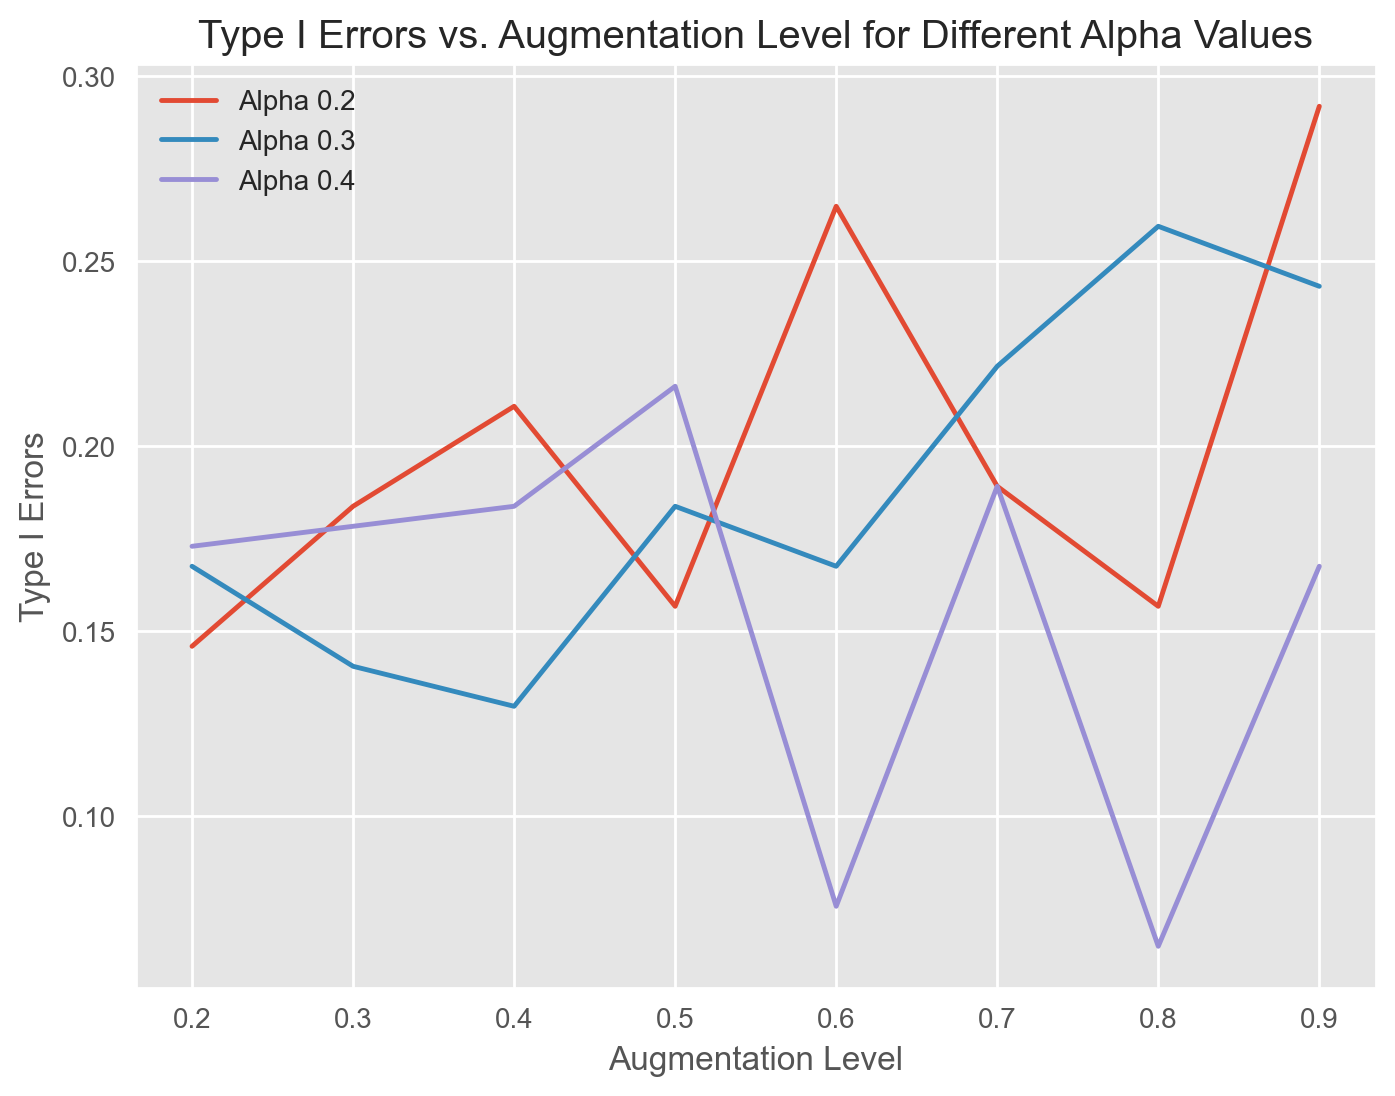

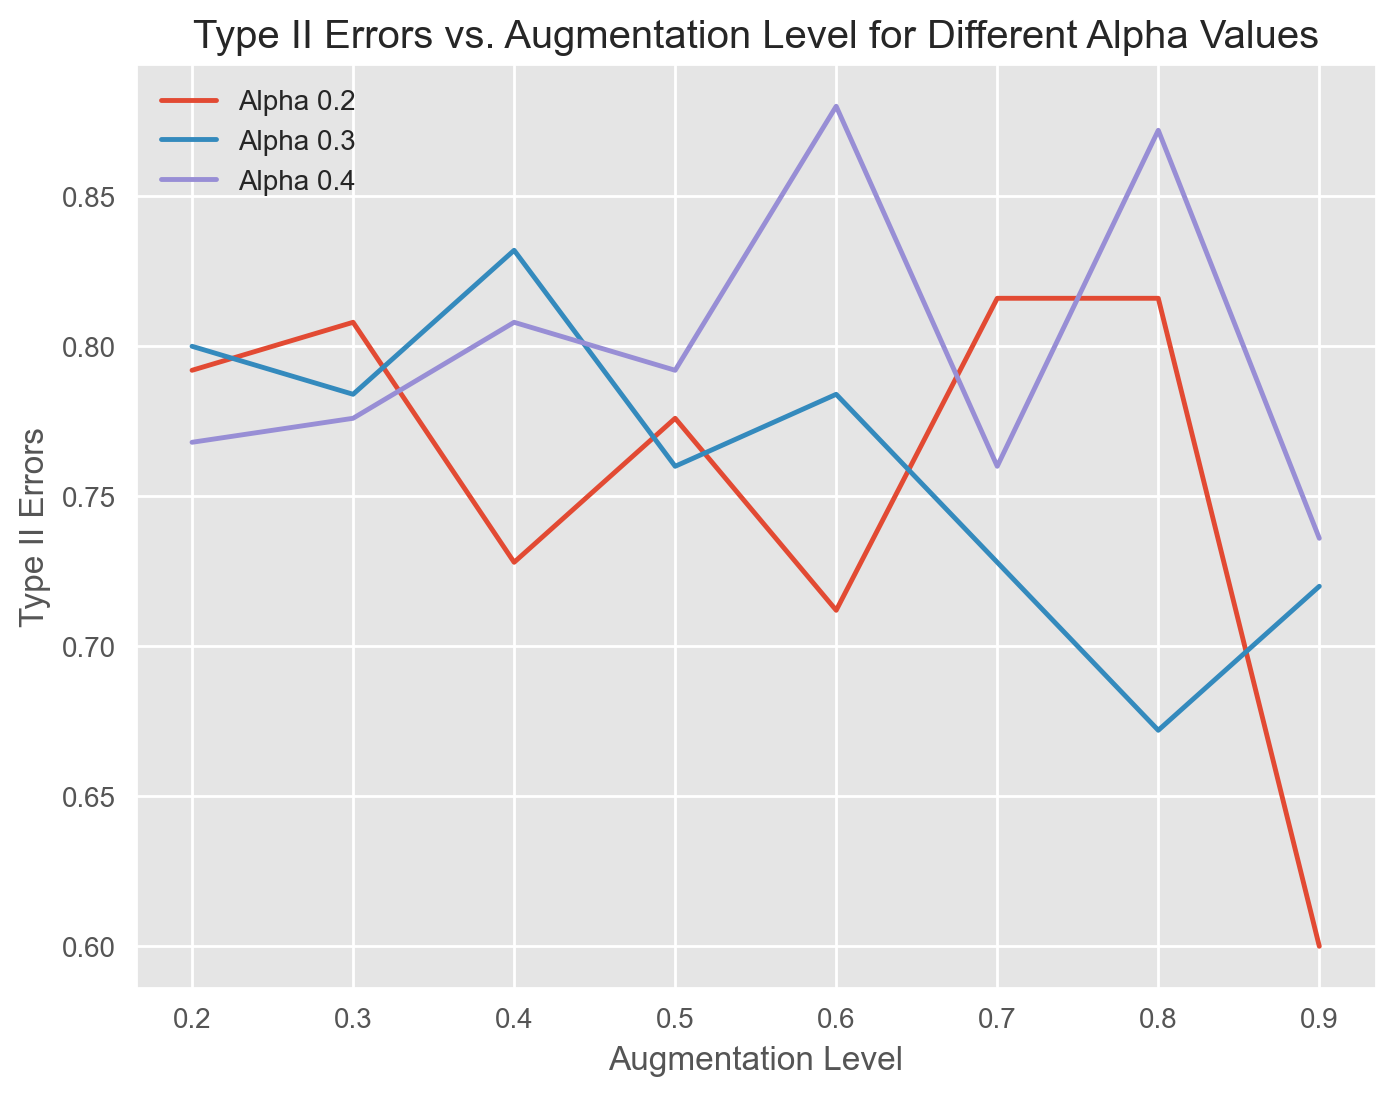

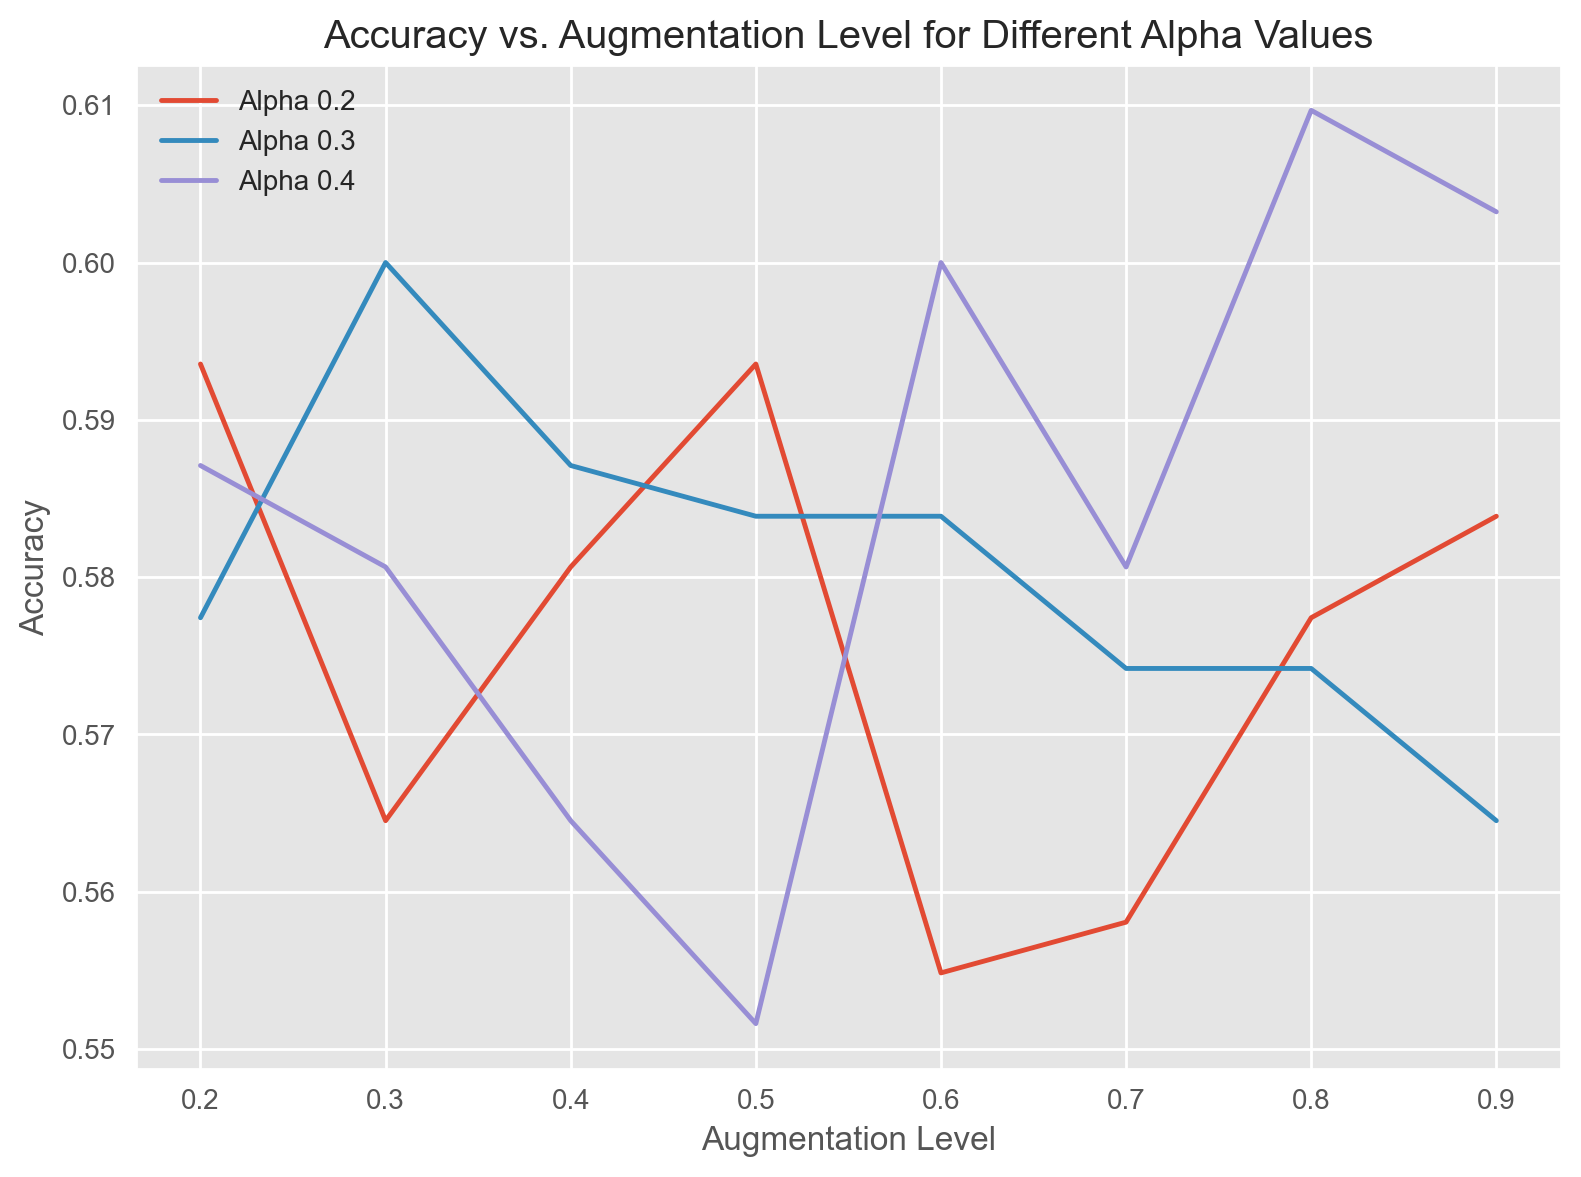

In [230]:
import matplotlib.pyplot as plt

def polter(result_dictionary):
    # Group the results by 'alpha'
    grouped_results = {}
    for i in range(len(result_dictionary['augmentation_percentage'])):
        ap = result_dictionary['augmentation_percentage'][i]
        alpha = result_dictionary['alpha'][i]
        Type_I_error = result_dictionary['Type_I_error'][i]
        Type_II_error = result_dictionary['Type_II_error'][i]
        accuracy = result_dictionary['acuracy'][i]
        if alpha not in grouped_results:
            grouped_results[alpha] = {'augmentation_levels': [], 'Type_I_errors': [], 'Type_II_errors': [], 'accuracies': []}

        grouped_results[alpha]['augmentation_levels'].append(ap)
        grouped_results[alpha]['Type_I_errors'].append(Type_I_error)
        grouped_results[alpha]['Type_II_errors'].append(Type_II_error)
        grouped_results[alpha]['accuracies'].append(accuracy)

    # Create separate graphs for each metric
    for metric_name, y_label in [('Type_I_errors', 'Type I Errors'),
                                 ('Type_II_errors', 'Type II Errors'),
                                 ('accuracies', 'Accuracy')]:
        plt.style.use('ggplot')
        plt.figure(figsize=(8, 6))
        for alpha, data in grouped_results.items():
            augmentation_levels = data['augmentation_levels']
            metric_values = data[metric_name]
            plt.plot(augmentation_levels, metric_values, label=f'Alpha {alpha}')
        plt.xlabel('Augmentation Level')
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs. Augmentation Level for Different Alpha Values')
        plt.legend()
        plt.grid(True)

        # Set x-axis ticks and labels
        augmentation_ticks = sorted(list(set(augmentation_levels)))  # Get unique augmentation levels
        plt.xticks(augmentation_ticks)

    plt.tight_layout()
    plt.show()


polter(final_results)
